Assumptions:

Data was entered accurately

    I cant check and change every cell on a large data set, so I won't do that here for the genres category
    
    However I will browse through the aritsts to see if I like how they have been entered
   
       IF an artist is not how I would like it to be, I will change it
       
       ELSE the artist name will not change


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime 
%matplotlib inline

def t_sec(x):
    x=str(x)
    m=x[0]
    s=x[1:3]
    m=int(m)
    s=int(s)
    t=m*60+s
    return t

df=pd.read_csv("/Users/thomas/GA-DSI/projects/projects-weekly/project-02/assets/billboard.csv")
name=range(1,77)
names=["week_"+str(x) for x in name]

#Renaming columns; made easier by using range function and concatenation
df.columns=['year','artist','track_name','track_time','genre','date_entered','date_peaked','week_1', 'week_2', \
            'week_3', 'week_4', 'week_5', 'week_6', 'week_7', 'week_8', 'week_9', 'week_10', 'week_11', 'week_12',\
            'week_13', 'week_14', 'week_15', 'week_16', 'week_17', 'week_18', 'week_19', 'week_20', 'week_21', \
            'week_22', 'week_23', 'week_24', 'week_25', 'week_26', 'week_27', 'week_28', 'week_29', 'week_30', \
            'week_31', 'week_32', 'week_33', 'week_34', 'week_35', 'week_36', 'week_37', 'week_38', 'week_39', \
            'week_40', 'week_41', 'week_42', 'week_43', 'week_44', 'week_45', 'week_46', 'week_47', 'week_48', \
            'week_49', 'week_50', 'week_51', 'week_52', 'week_53', 'week_54', 'week_55', 'week_56', 'week_57', \
            'week_58', 'week_59', 'week_60', 'week_61', 'week_62', 'week_63', 'week_64', 'week_65', 'week_66', \
            'week_67', 'week_68', 'week_69', 'week_70', 'week_71', 'week_72', 'week_73', 'week_74', 'week_75', \
            'week_76']

#Change time to seconds
df["track_time"]=df["track_time"].apply(lambda x: t_sec(int(x[0:7].replace(',',''))))

#Change Genre Names
df['genre'].replace('R & B','R&B', inplace=True)
df['genre'].replace("Rock'n'roll","Rock",inplace=True)

#Datetime
df['date_entered']=pd.to_datetime(df['date_entered'])
df['date_peaked']=pd.to_datetime(df['date_peaked'])

#Artist Names
df["artist"].replace("Janet","Janet Jackson",inplace=True)
df["artist"].replace("2Ge+her","2Gether",inplace=True)
df["artist"].replace("matchbox twenty","Matchbox Twenty",inplace=True)

#Take * and replace with NaN
df.replace('*',np.nan,inplace=True)
#New column for days between date_entered and date_peaked
df["days_between"]= [int(datetime.strftime(x,"%j"))-int(datetime.strftime(y,"%j")) if  \
       int(datetime.strftime(x,"%j"))-int(datetime.strftime(y,"%j"))>=0 else \
       int(datetime.strftime(x,"%j"))-int(datetime.strftime(y,"%j"))+365 \
                    for x,y in zip(df['date_peaked']\
                                   , df['date_entered'])]
#look up how to convert date to how many days have past in year
#might have to set date to %m-%d and create dictionary with month values and compute manually from there

In [440]:
#print [True if x==np.nan else False for x in (df['week_1'].astype(np.int))]

In [441]:
#Weeks in chart ; lowest rank ; weeks at lowest rank ; 
i=1
array=np.ones([1,2])
#print array
while i<len(df['year']):
    x=df.iloc[i,7:-1].value_counts().reset_index()
    x['index']=x['index'].astype(np.int)
    x=x.sort_values('index')
    x=np.array(x.iloc[[0]])[0]
    x = x.reshape((1,2))
    array = np.hstack([x,array])
    i+=1
array=array.reshape((317,2))
array=array[0:317] #Get rid of original ones array
dfarray=pd.DataFrame(array,columns=["Lowest_Rank","Weeks_at_Lowest"])
dfarray[::-1]


,Lowest_Rank,Weeks_at_Lowest
316,1.0,1.0
315,1.0,10.0
314,1.0,4.0
313,1.0,4.0
312,1.0,4.0
311,1.0,3.0
310,1.0,3.0
309,1.0,3.0
308,1.0,2.0
307,1.0,2.0


In [2]:
#print [x for x in df]
x=['week_1', 'week_2', 'week_3', 'week_4', 'week_5', 'week_6', 'week_7', 'week_8', 'week_9', 'week_10', 'week_11', 'week_12', 'week_13', 'week_14', 'week_15', 'week_16', 'week_17', 'week_18', 'week_19', 'week_20', 'week_21', 'week_22', 'week_23', 'week_24', 'week_25', 'week_26', 'week_27', 'week_28', 'week_29', 'week_30', 'week_31', 'week_32', 'week_33', 'week_34', 'week_35', 'week_36', 'week_37', 'week_38', 'week_39', 'week_40', 'week_41', 'week_42', 'week_43', 'week_44', 'week_45', 'week_46', 'week_47', 'week_48', 'week_49', 'week_50', 'week_51', 'week_52', 'week_53', 'week_54', 'week_55', 'week_56', 'week_57', 'week_58', 'week_59', 'week_60', 'week_61', 'week_62', 'week_63', 'week_64', 'week_65', 'week_66', 'week_67', 'week_68', 'week_69', 'week_70', 'week_71', 'week_72', 'week_73', 'week_74', 'week_75', 'week_76']

In [ ]:
melt_df=pd.melt(df,id_vars=['artist','track_name','genre'],value_vars=x)
melt_df=melt_df[pd.notnull(melt_df['value'])]
melt_df.sort('artist')
melt_df['value']=melt_df['value'].astype(np.int)

In [ ]:
df[df['track_name']=='Independent Women Part I']

In [36]:
temp=melt_df.groupby(['artist','track_name'])['value'].value_counts().to_frame()
r=pd.DataFrame(melt_df.sort('track_name'))
r

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,artist,track_name,genre,variable,value
5753,Nelly,(Hot S**t) Country Grammar,Rap,week_19,11
7338,Nelly,(Hot S**t) Country Grammar,Rap,week_24,10
7655,Nelly,(Hot S**t) Country Grammar,Rap,week_25,11
9874,Nelly,(Hot S**t) Country Grammar,Rap,week_32,37
9557,Nelly,(Hot S**t) Country Grammar,Rap,week_31,33
10191,Nelly,(Hot S**t) Country Grammar,Rap,week_33,36
364,Nelly,(Hot S**t) Country Grammar,Rap,week_2,99
47,Nelly,(Hot S**t) Country Grammar,Rap,week_1,100
2900,Nelly,(Hot S**t) Country Grammar,Rap,week_10,36
4802,Nelly,(Hot S**t) Country Grammar,Rap,week_16,17


In [6]:
min_melt=melt_df.groupby(['track_name','artist'])['value'].min().to_frame()
max_melt=melt_df.groupby(['track_name','artist'])['value'].max().to_frame()

song_melt=melt=melt_df.groupby(['artist'])['track_name'].unique().to_frame()
val_melt=melt=melt_df.groupby(['artist','track_name'])['variable'].nunique().to_frame()
gen_melt=melt=melt_df.groupby(['genre'])['variable'].nunique().to_frame()
melt_df
#plt.hist(gen_melt['variable'])

,artist,track_name,genre,variable,value
0,Destiny's Child,Independent Women Part I,Rock,week_1,78
1,Santana,"Maria, Maria",Rock,week_1,15
2,Savage Garden,I Knew I Loved You,Rock,week_1,71
3,Madonna,Music,Rock,week_1,41
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),Rock,week_1,57
5,Janet Jackson,Doesn't Really Matter,Rock,week_1,59
6,Destiny's Child,Say My Name,Rock,week_1,83
7,"Iglesias, Enrique",Be With You,Latin,week_1,63
8,Sisqo,Incomplete,Rock,week_1,77
9,Lonestar,Amazed,Country,week_1,81


In [315]:
print len (df['artist'])
print 0 in df[[x for x in df]]
x=df.iloc[1,7:].value_counts().reset_index()
x['index']=x['index'].astype(np.int)
x=x.sort_values('index')
print x
x=np.array(x.iloc[[0]])[0]
print 
print "The Matrix to be stacked", x
x = x.reshape((1,2))
array = np.hstack([x,array])

317
False
    index   1
1       1  10
2       2   3
7       3   1
6       5   1
5       6   1
3       8   2
8      15   1
14     15   1
11     19   1
13     21   1
15     26   1
9      36   1
10     47   1
12     48   1
4      56   1
0     101  49

The Matrix to be stacked [ 1 10]


In [507]:
df[df['artist']=='Madonna']

,year,artist,track_name,track_time,genre,date_entered,date_peaked,week_1,week_2,week_3,...,week_68,week_69,week_70,week_71,week_72,week_73,week_74,week_75,week_76,days_between
3,2000,Madonna,Music,225,Rock,2000-08-12,2000-09-16,41,23,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35
117,2000,Madonna,American Pie,270,Rock,2000-02-19,2000-03-04,43,35,29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14


In [320]:
print [True if x==0 for x in df[[x for x in df]]]

SyntaxError: invalid syntax (<ipython-input-320-44baed255c8e>, line 1)

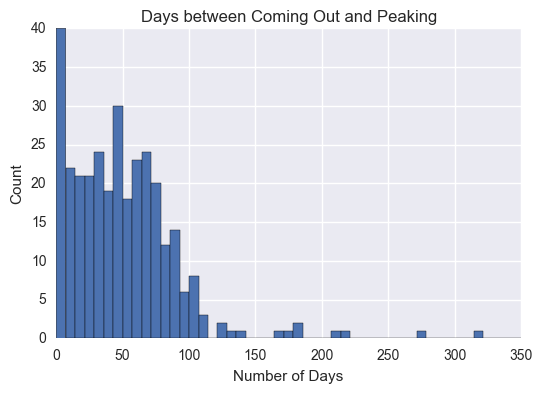

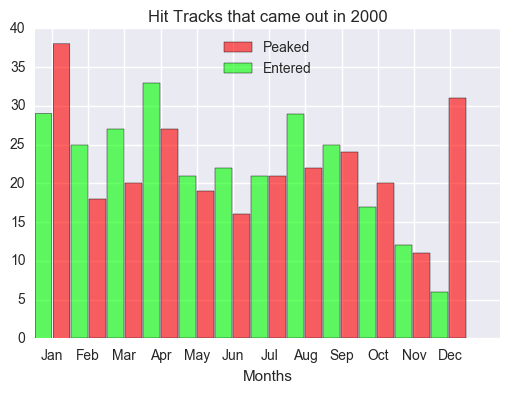

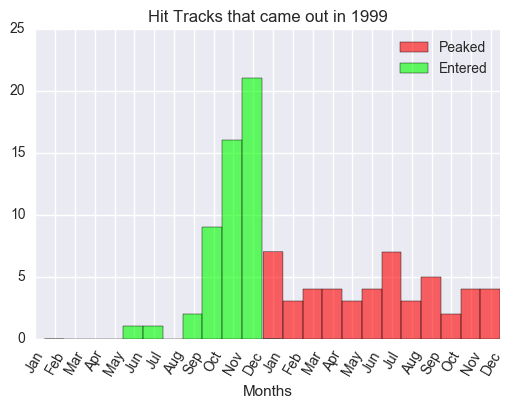

In [166]:
#plt.bar(df['date_peaked'].unique(),df['date_peaked'].value_counts())
#plt.show()
plt.hist(df['days_between'],np.linspace(0,350,50))
plt.title("Days between Coming Out and Peaking")
plt.xlabel("Number of Days")
plt.ylabel("Count")
plt.show()

month_peak2000=np.array([datetime.strftime(x,"%-m") for x,y in zip(df['date_peaked'],\
                [x for x in df['date_entered'] if int(str(pd.to_datetime(x,'%Y'))[0:4]) == 2000])]).astype(int)
start2000=np.array([datetime.strftime(x,'%-m') for x in \
               [x for x in df['date_entered'] if int(str(pd.to_datetime(x,'%Y'))[0:4]) == 2000]\
               ]).astype(int)

plt.hist(month_peak2000,np.linspace(0,13,13),color=(1,0,0,.6),label="Peaked",width=0.5,align='right')
plt.hist(start2000,np.linspace(0,13,13),color=(0,1,0,.6),label="Entered",width=0.5)
plt.xticks(np.linspace(.5,12.5,12),["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
plt.xlabel("Months")
plt.title("Hit Tracks that came out in 2000")
plt.legend(loc=9)
plt.show()


month_peak1999=np.array([datetime.strftime(x,"%-m") for x,y in zip(df['date_peaked'],\
                [x for x in df['date_entered'] if int(str(pd.to_datetime(x,'%Y'))[0:4]) == 1999])]).astype(int)
start1999=np.array([datetime.strftime(x,'%-m') for x in \
               [x for x in df['date_entered'] if int(str(pd.to_datetime(x,'%Y'))[0:4]) == 1999]\
               ]).astype(int)

plt.hist(month_peak1999+12,np.linspace(12,25,13),color=(1,0,0,.6),label="Peaked")
plt.hist(start1999-1,np.linspace(0,13,13),color=(0,1,0,.6),label="Entered")
plt.xticks(np.linspace(-0.5,24.5,24),["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec",\
                                     "Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],\
           rotation=60)
plt.xlabel("Months")
plt.title("Hit Tracks that came out in 1999")
plt.legend(loc='upper right')
plt.show()

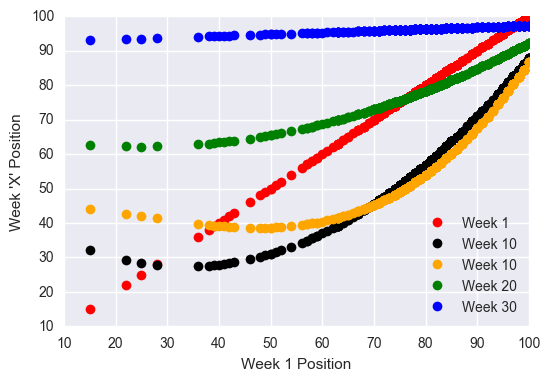

In [42]:
fit1=np.polyfit(df['week_1'],df['week_1'].astype(np.int),3)
fit_fn1=np.poly1d(fit1)
fit5=np.polyfit(df['week_1'],df['week_5'].astype(np.int),2)
fit_fn5=np.poly1d(fit5)
fit10=np.polyfit(df['week_1'].astype(np.int),df['week_10'].astype(np.int),3)
fit_fn10=np.poly1d(fit10)
fit20=np.polyfit(df['week_1'].astype(np.int),df['week_20'].astype(np.int),2)
fit_fn20=np.poly1d(fit20)
fit30=np.polyfit(df['week_1'].astype(np.int),df['week_30'].astype(np.int),1)
fit_fn30=np.poly1d(fit30)
plt.plot(df['week_1'],fit_fn1(df['week_1']),'o',color='red',label='Week 1')
plt.plot(df['week_1'],fit_fn5(df['week_1'].astype(np.int)),'o',color='black',label='Week 10')
plt.plot(df['week_1'],fit_fn10(df['week_1'].astype(np.int)),'o',color='orange',label='Week 10')
plt.plot(df['week_1'],fit_fn20(df['week_1'].astype(np.int)),'o',color='green',label='Week 20')
plt.plot(df['week_1'],fit_fn30(df['week_1'].astype(np.int)),'o',color='blue',label='Week 30')
plt.xlabel('Week 1 Position')
plt.ylabel('Week \'X\' Position')
plt.legend(loc="lower right")
plt.show()

In [5]:
df.head()

,year,artist,track_name,track_time,genre,date_entered,date_peaked,week_1,week_2,week_3,...,week_68,week_69,week_70,week_71,week_72,week_73,week_74,week_75,week_76,days_between
0,2000,Destiny's Child,Independent Women Part I,218,Rock,2000-09-23,2000-11-18,78,63,49,...,101,101,101,101,101,101,101,101,101,56
1,2000,Santana,"Maria, Maria",258,Rock,2000-02-12,2000-04-08,15,8,6,...,101,101,101,101,101,101,101,101,101,56
2,2000,Savage Garden,I Knew I Loved You,247,Rock,1999-10-23,2000-01-29,71,48,43,...,101,101,101,101,101,101,101,101,101,98
3,2000,Madonna,Music,225,Rock,2000-08-12,2000-09-16,41,23,18,...,101,101,101,101,101,101,101,101,101,35
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),218,Rock,2000-08-05,2000-10-14,57,47,45,...,101,101,101,101,101,101,101,101,101,70


In [ ]:
date_peaked=np.array([[x,temp["M"].value_counts()[x]] for x in temp["M"].unique()])
dat_p=date_peaked.T[0]
day_p=(date_peaked.T[1]).astype(int)
peaked=date_peaked.T

In [36]:
pd.set_option('display.max_rows', 80)

In [59]:
[x for x in df['date_entered'] if int(str(pd.to_datetime(x,'%Y'))[0:4]) == 2000]

[Timestamp('2000-09-23 00:00:00'),
 Timestamp('2000-02-12 00:00:00'),
 Timestamp('2000-08-12 00:00:00'),
 Timestamp('2000-08-05 00:00:00'),
 Timestamp('2000-06-17 00:00:00'),
 Timestamp('2000-04-01 00:00:00'),
 Timestamp('2000-06-24 00:00:00'),
 Timestamp('2000-05-06 00:00:00'),
 Timestamp('2000-01-22 00:00:00'),
 Timestamp('2000-05-13 00:00:00'),
 Timestamp('2000-03-18 00:00:00'),
 Timestamp('2000-04-29 00:00:00'),
 Timestamp('2000-08-19 00:00:00'),
 Timestamp('2000-09-30 00:00:00'),
 Timestamp('2000-03-18 00:00:00'),
 Timestamp('2000-02-26 00:00:00'),
 Timestamp('2000-08-19 00:00:00'),
 Timestamp('2000-05-13 00:00:00'),
 Timestamp('2000-04-08 00:00:00'),
 Timestamp('2000-01-29 00:00:00'),
 Timestamp('2000-04-15 00:00:00'),
 Timestamp('2000-01-01 00:00:00'),
 Timestamp('2000-01-29 00:00:00'),
 Timestamp('2000-05-06 00:00:00'),
 Timestamp('2000-08-12 00:00:00'),
 Timestamp('2000-09-09 00:00:00'),
 Timestamp('2000-02-19 00:00:00'),
 Timestamp('2000-09-30 00:00:00'),
 Timestamp('2000-07-